<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/2DimensionalityReduction/2.2LinearMethods/2_2_1PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Analysis Component (PCA)

**2D**

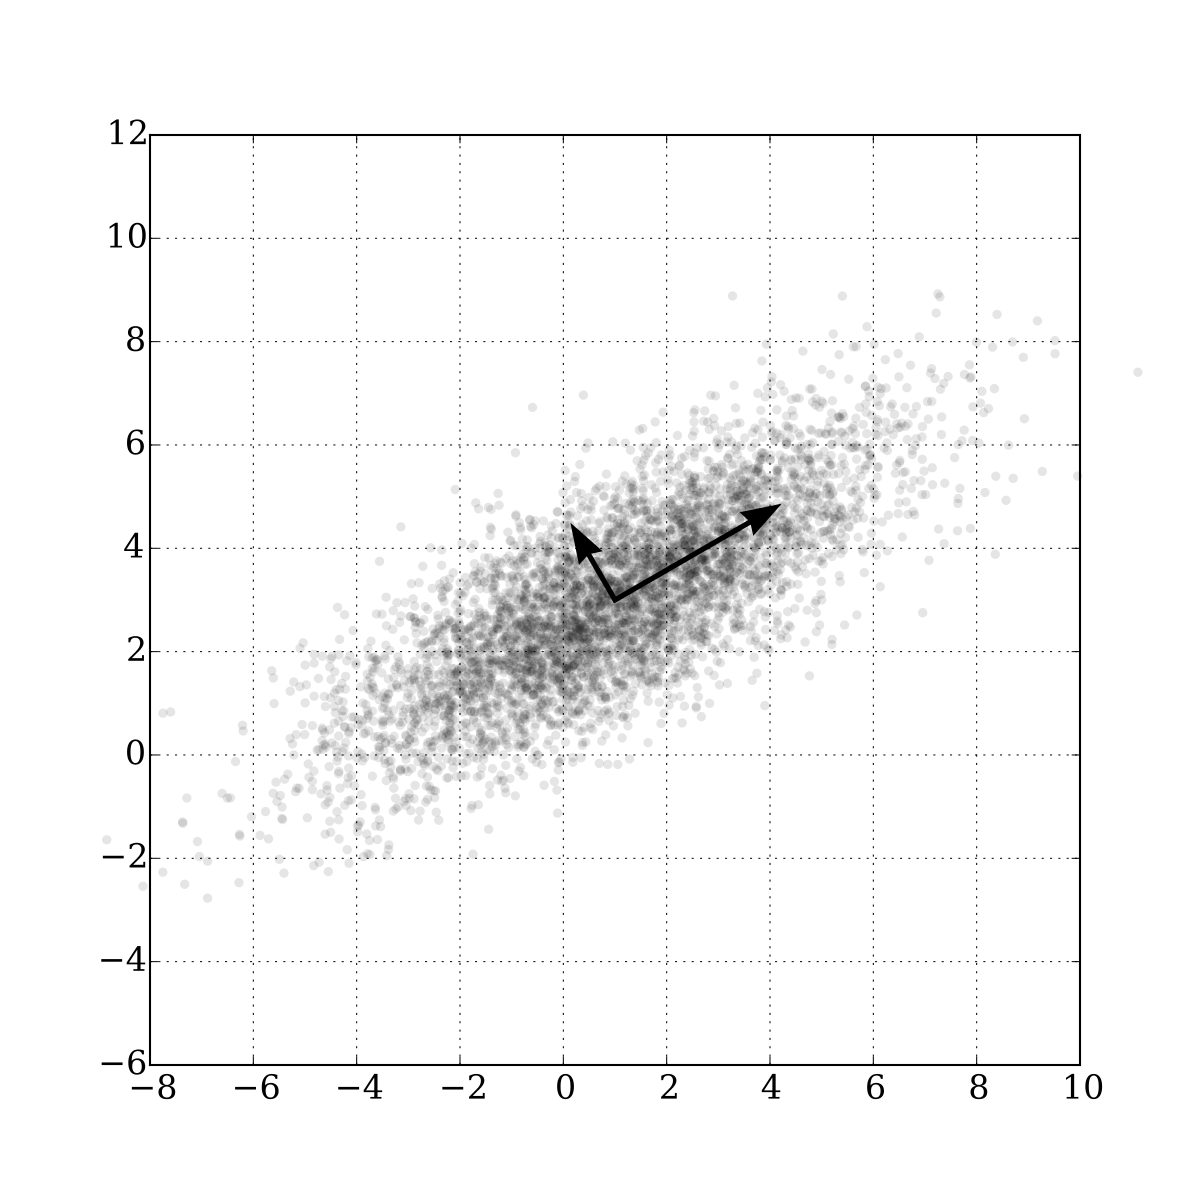

**3D**

In [46]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_excel('/content/gdrive/My Drive/DataSet/Escaperoom.xlsx')

Mounted at /content/gdrive


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [47]:
df.head()

,Number,M-F,Ave_Age,Prev_Ed,Ave_Exp,Ave_Fear,Hint,Ans,Plague,Progress,Victory
0,4,0.00,26.75,16,0.50,62.50,6,2,0,87,0
1,5,0.20,31.20,16,1.40,77.00,7,4,0,82,0
2,7,1.00,18.71,12,2.57,80.71,10,3,0,81,0
3,7,0.14,21.86,16,2.14,45.00,6,2,0,102,1
4,5,0.20,26.80,21,3.60,66.00,3,0,0,111,1


Train-Test_Split

In [50]:
features = df.values[:,:9]
target = df.values[:,10:]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= 0.2)

## 3 PCA

In [51]:
pca3=PCA(n_components=3)
XYZ = pca3.fit_transform(features)

**PCA Information**

In [52]:
pca3.components_

array([[-1.37071726e-03,  6.28255600e-03,  2.19469251e-02,
        -1.62140388e-03,  1.49797993e-02, -9.99595319e-01,
         6.66689258e-03, -3.73519286e-03,  8.71437924e-04],
       [ 9.82852223e-03, -1.04572075e-02,  8.57833662e-01,
         4.58632515e-01,  6.27491858e-02,  1.78256857e-02,
        -2.09762020e-01, -7.29098584e-02,  7.08927867e-04],
       [-2.55436424e-02,  1.79817451e-02, -2.54114822e-01,
         1.02824335e-01,  7.87301035e-01,  3.25615534e-03,
        -5.29562554e-01, -1.46671780e-01,  4.55451370e-02]])

In [53]:
pca3.explained_variance_ratio_

array([0.87359956, 0.07279964, 0.02077742])

In [54]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.87359956, 0.9463992 , 0.96717662])

**PCA Plot 2D**

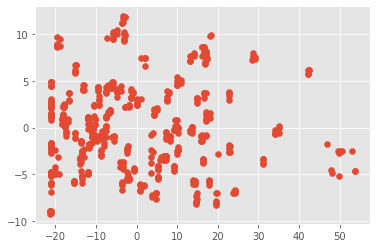

In [55]:
plt.style.use('ggplot')
plt.scatter(XYZ[:,0],XYZ[:,1])

**PCA Plot 3D**

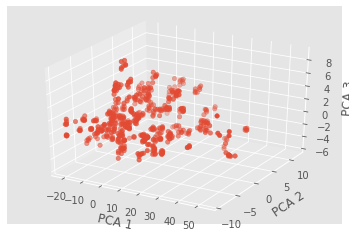

In [56]:
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XYZ[:,0], XYZ[:,1], XYZ[:,2])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

## PCA for All Features

In [58]:
pca=PCA(n_components=9)
X9 = pca.fit_transform(features)

In [60]:
pca.components_

array([[-1.37071726e-03,  6.28255600e-03,  2.19469251e-02,
        -1.62140388e-03,  1.49797993e-02, -9.99595319e-01,
         6.66689258e-03, -3.73519286e-03,  8.71437924e-04],
       [ 9.82852223e-03, -1.04572075e-02,  8.57833662e-01,
         4.58632515e-01,  6.27491858e-02,  1.78256857e-02,
        -2.09762020e-01, -7.29098584e-02,  7.08927867e-04],
       [-2.55436424e-02,  1.79817451e-02, -2.54114822e-01,
         1.02824335e-01,  7.87301035e-01,  3.25615534e-03,
        -5.29562554e-01, -1.46671780e-01,  4.55451370e-02],
       [ 2.66852816e-03, -8.85396305e-03,  1.52387387e-01,
         1.25972844e-02,  5.97749742e-01,  1.64365004e-02,
         7.55859674e-01,  2.17488657e-01, -1.82702731e-02],
       [ 4.96459910e-02, -1.68180366e-03, -4.19012234e-01,
         8.79919424e-01, -1.30622247e-01, -1.15617286e-02,
         1.71394241e-01,  3.34838554e-03, -3.34658044e-02],
       [ 9.74917107e-01, -7.90225387e-02,  2.96099754e-03,
        -3.72013676e-02,  2.37805210e-02, -2.587184

In [59]:
pca.explained_variance_ratio_

array([8.73599564e-01, 7.27996380e-02, 2.07774160e-02, 1.59411593e-02,
       7.49944499e-03, 4.53418711e-03, 3.52160669e-03, 1.06099585e-03,
       2.65988555e-04])

In [62]:
np.cumsum(pca.explained_variance_ratio_)

array([0.87359956, 0.9463992 , 0.96717662, 0.98311778, 0.99061722,
       0.99515141, 0.99867302, 0.99973401, 1.        ])

## Model with 2 PCA

In [63]:
# ANN on Features

mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(features_train, target_train)
target_pred = mlp.predict(features_test)
accuracy_score(target_pred , target_test)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9024390243902439

In [65]:
# ANN on 2 PCA

X_train , X_test , y_train , y_test = train_test_split(XYZ[:,0:2], target, test_size=0.2, train_size= 0.8)
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_pred , y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7235772357723578